In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Path where our data is located
base_path = "/content/drive/MyDrive/data/asl_dataset/asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,filename,category
0,e/hand2_e_dif_seg_1_cropped.jpeg,14
1,3/hand5_3_dif_seg_5_cropped.jpeg,3
2,s/hand1_s_right_seg_5_cropped.jpeg,28
3,1/hand2_1_left_seg_5_cropped.jpeg,1
4,d/hand1_d_dif_seg_3_cropped.jpeg,13
...,...,...
2510,l/hand2_l_dif_seg_5_cropped.jpeg,21
2511,z/hand5_z_dif_seg_1_cropped.jpeg,35
2512,t/hand1_t_dif_seg_2_cropped.jpeg,29
2513,v/hand2_v_right_seg_5_cropped.jpeg,31


In [ ]:
print("number of elements = ", len(df))

number of elements =  2515


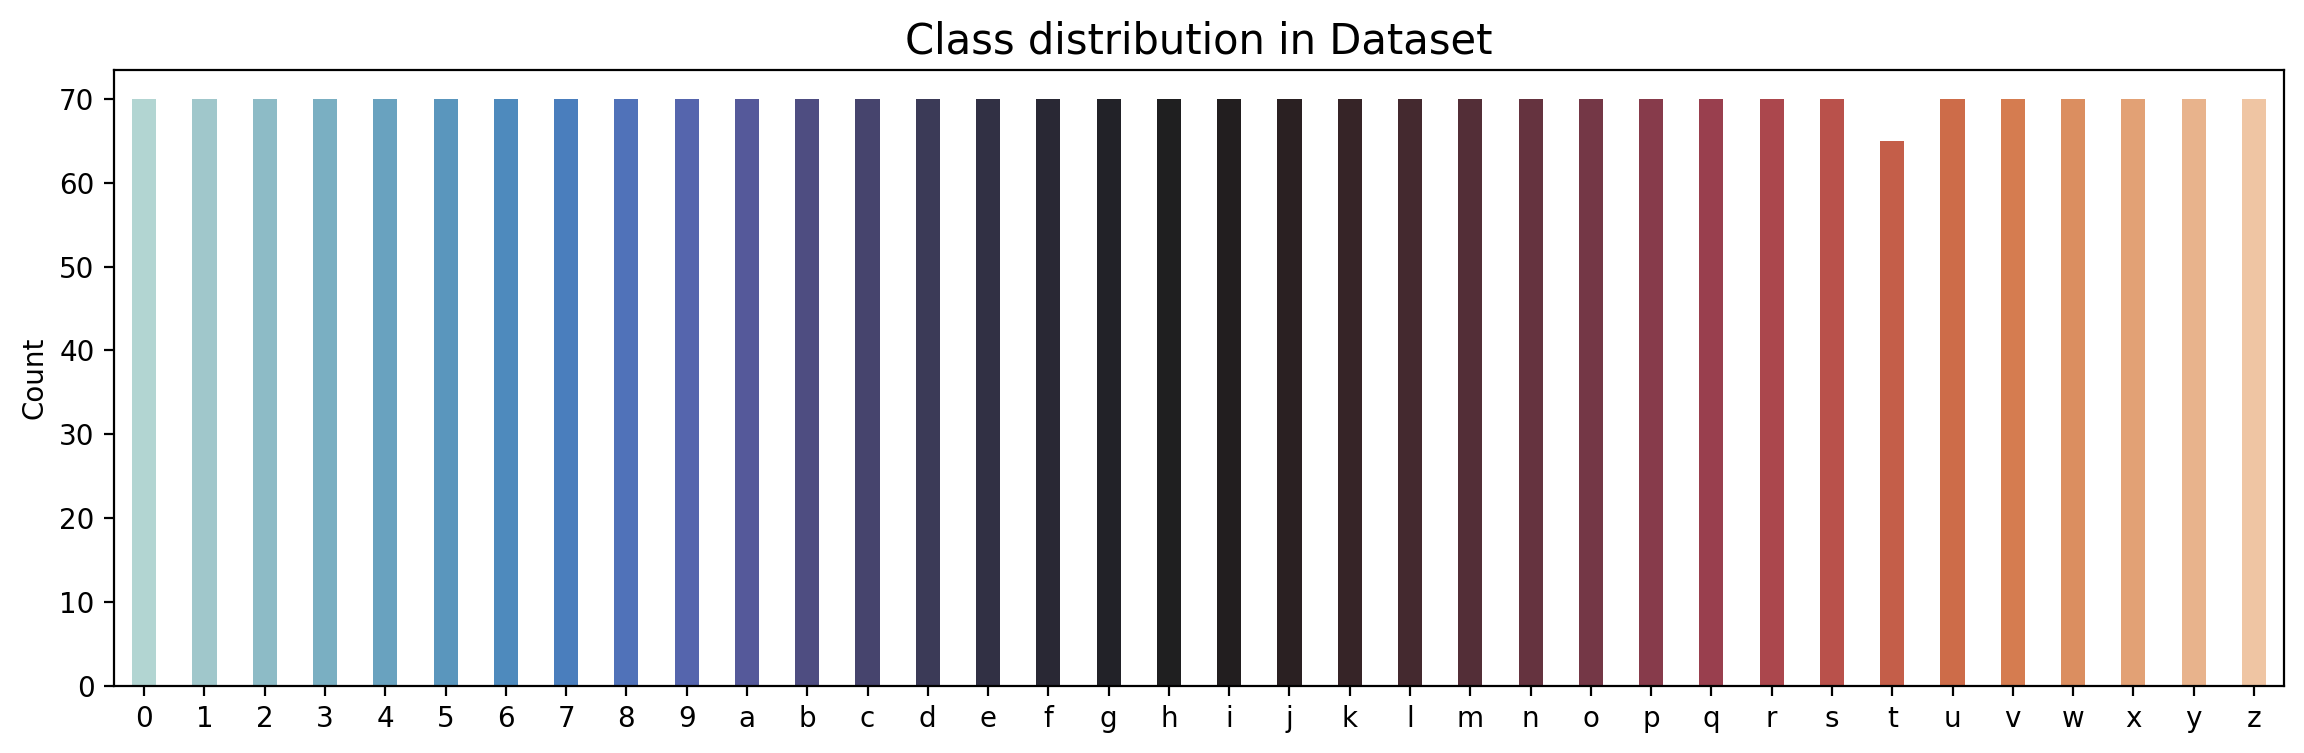

In [ ]:
label,count = np.unique(df.category,return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/data/asl_dataset/asl_dataset',output='/content/kaggle/working/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 2515 files [00:05, 488.25 files/s]


In [ ]:
import os

train_path = "/content/kaggle/working/train/asl_dataset"
val_path = "/content/kaggle/working/val/asl_dataset"
test_path = "/content/kaggle/working/test/asl_dataset"

if os.path.exists(train_path):
    print(f"Deleting {train_path}")
    shutil.rmtree(train_path)
else:
    print(f"The directory {train_path} does not exist.")

if os.path.exists(val_path):
    print(f"Deleting {val_path}")
    shutil.rmtree(val_path)
else:
    print(f"The directory {val_path} does not exist.")

if os.path.exists(test_path):
    print(f"Deleting {test_path}")
    shutil.rmtree(test_path)
else:
    print(f"The directory {test_path} does not exist.")


The directory /content/kaggle/working/train/asl_dataset does not exist.
The directory /content/kaggle/working/val/asl_dataset does not exist.
The directory /content/kaggle/working/test/asl_dataset does not exist.


In [ ]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [ ]:
train_path = '/kaggle/working/train'
val_path = '/kaggle/working/val'
test_path = '/kaggle/working/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [ ]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


In [ ]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

#Block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                        

In [ ]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=30,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 [==============================] - 23s 213ms/step - loss: 2.5315 - accuracy: 0.3226 - val_loss: 0.5745 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 11s 168ms/step - loss: 0.7240 - accuracy: 0.7838 - val_loss: 0.2821 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 10s 157ms/step - loss: 0.3556 - accuracy: 0.8872 - val_loss: 0.1676 - val_accuracy: 0.9402 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 10s 161ms/step - loss: 0.2061 - accuracy: 0.9334 - val_loss: 0.1134 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 10s 157ms/step - loss: 0.1723 - accuracy: 0.9463 - val_loss: 0.0835 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - 10s 155ms/step - loss: 0.1209 - accuracy: 0.9607 - val_loss: 0.1239 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - 10s 161ms/st

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.9502956867218
The Loss of the model for training data is: 0.004437749739736319
The accuracy of the model for validation data is: 97.60956168174744
The Loss of the model for validation data is: 0.07047349214553833


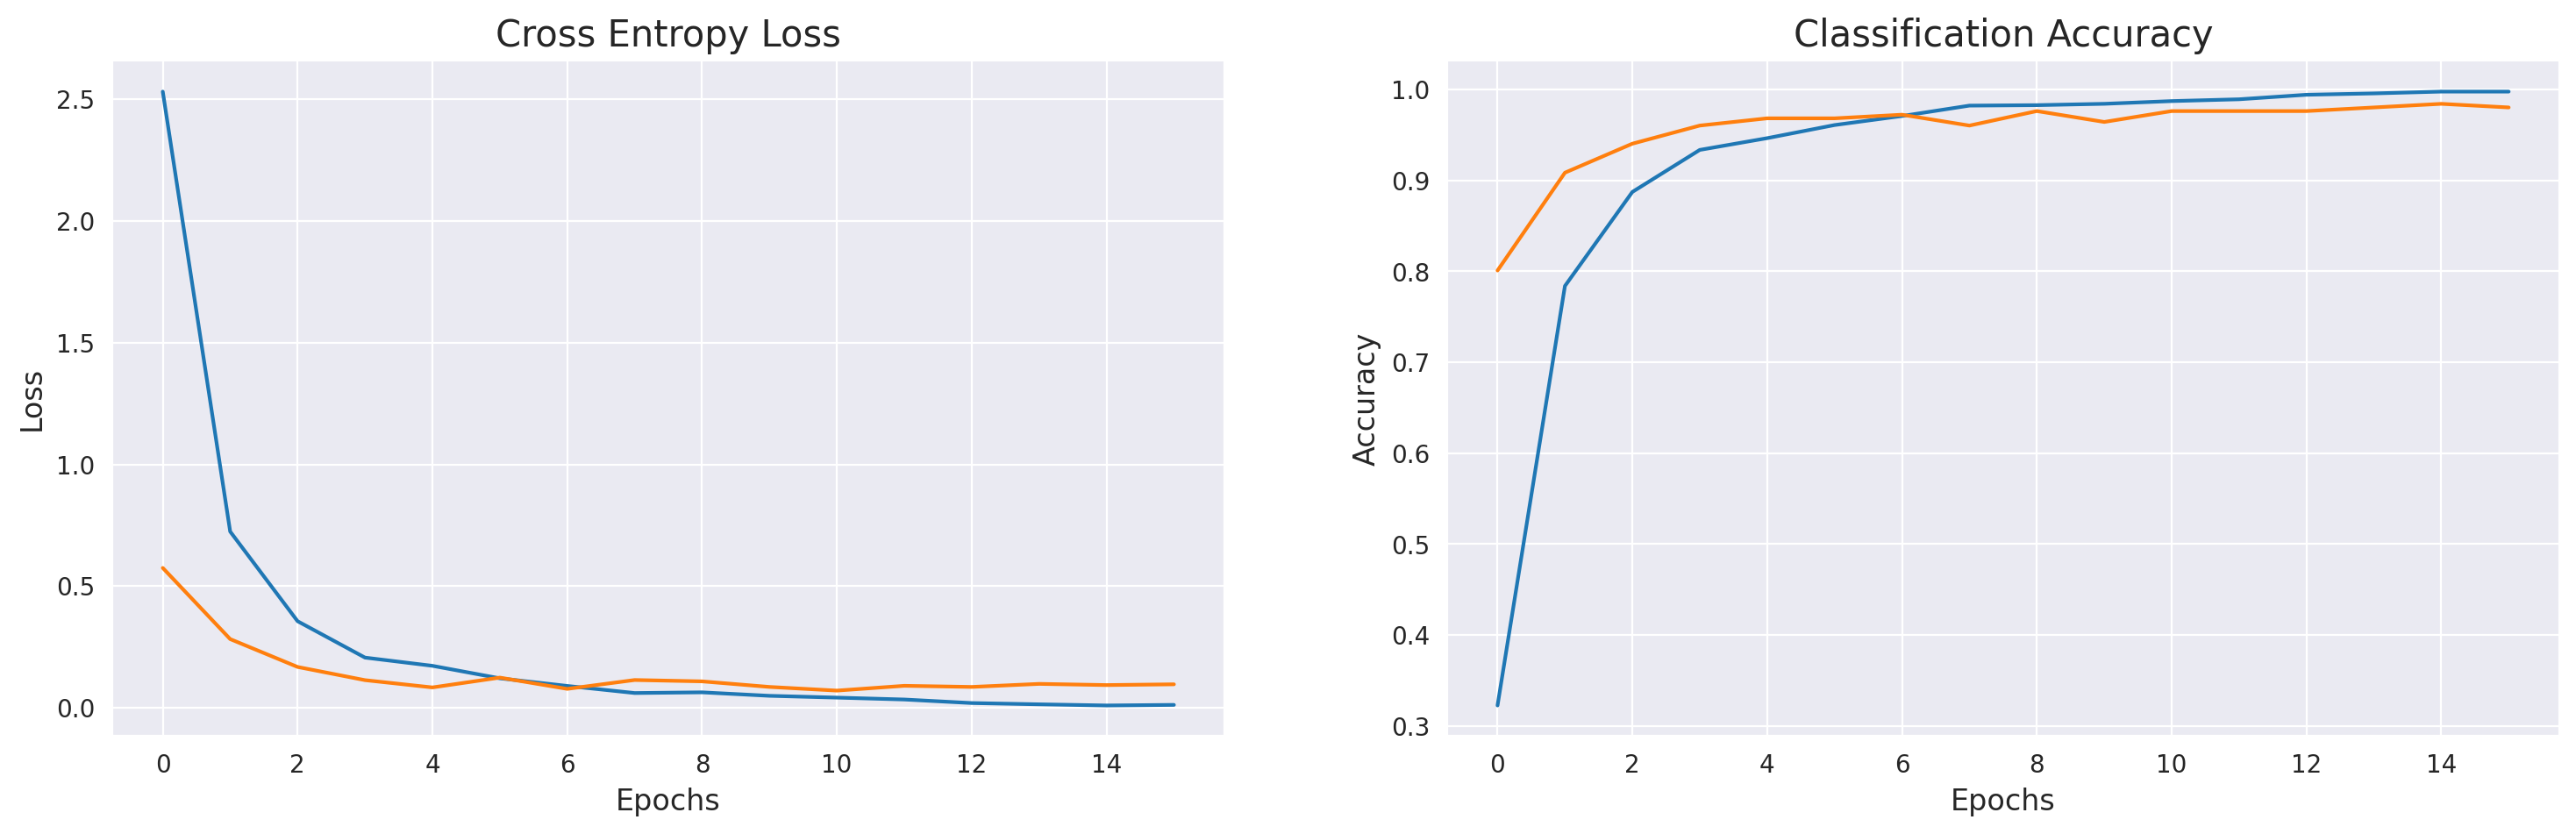

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 93.65079402923584
The Loss of the model for testing data is: 0.3403424322605133


In [ ]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 236
Incorrect predicted classes: 16


In [ ]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.78      1.00      0.88         7
           2       0.86      0.86      0.86         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      0.71      0.83         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
           a       0.88      1.00      0.93         7
           b       1.00      0.86      0.92         7
           c       1.00      0.86      0.92         7
           d       1.00      1.00      1.00         7
           e       1.00      1.00      1.00         7
           f       1.00      1.00      1.00         7
           g       1.00      0.86      0.92         7
           h       1.00    

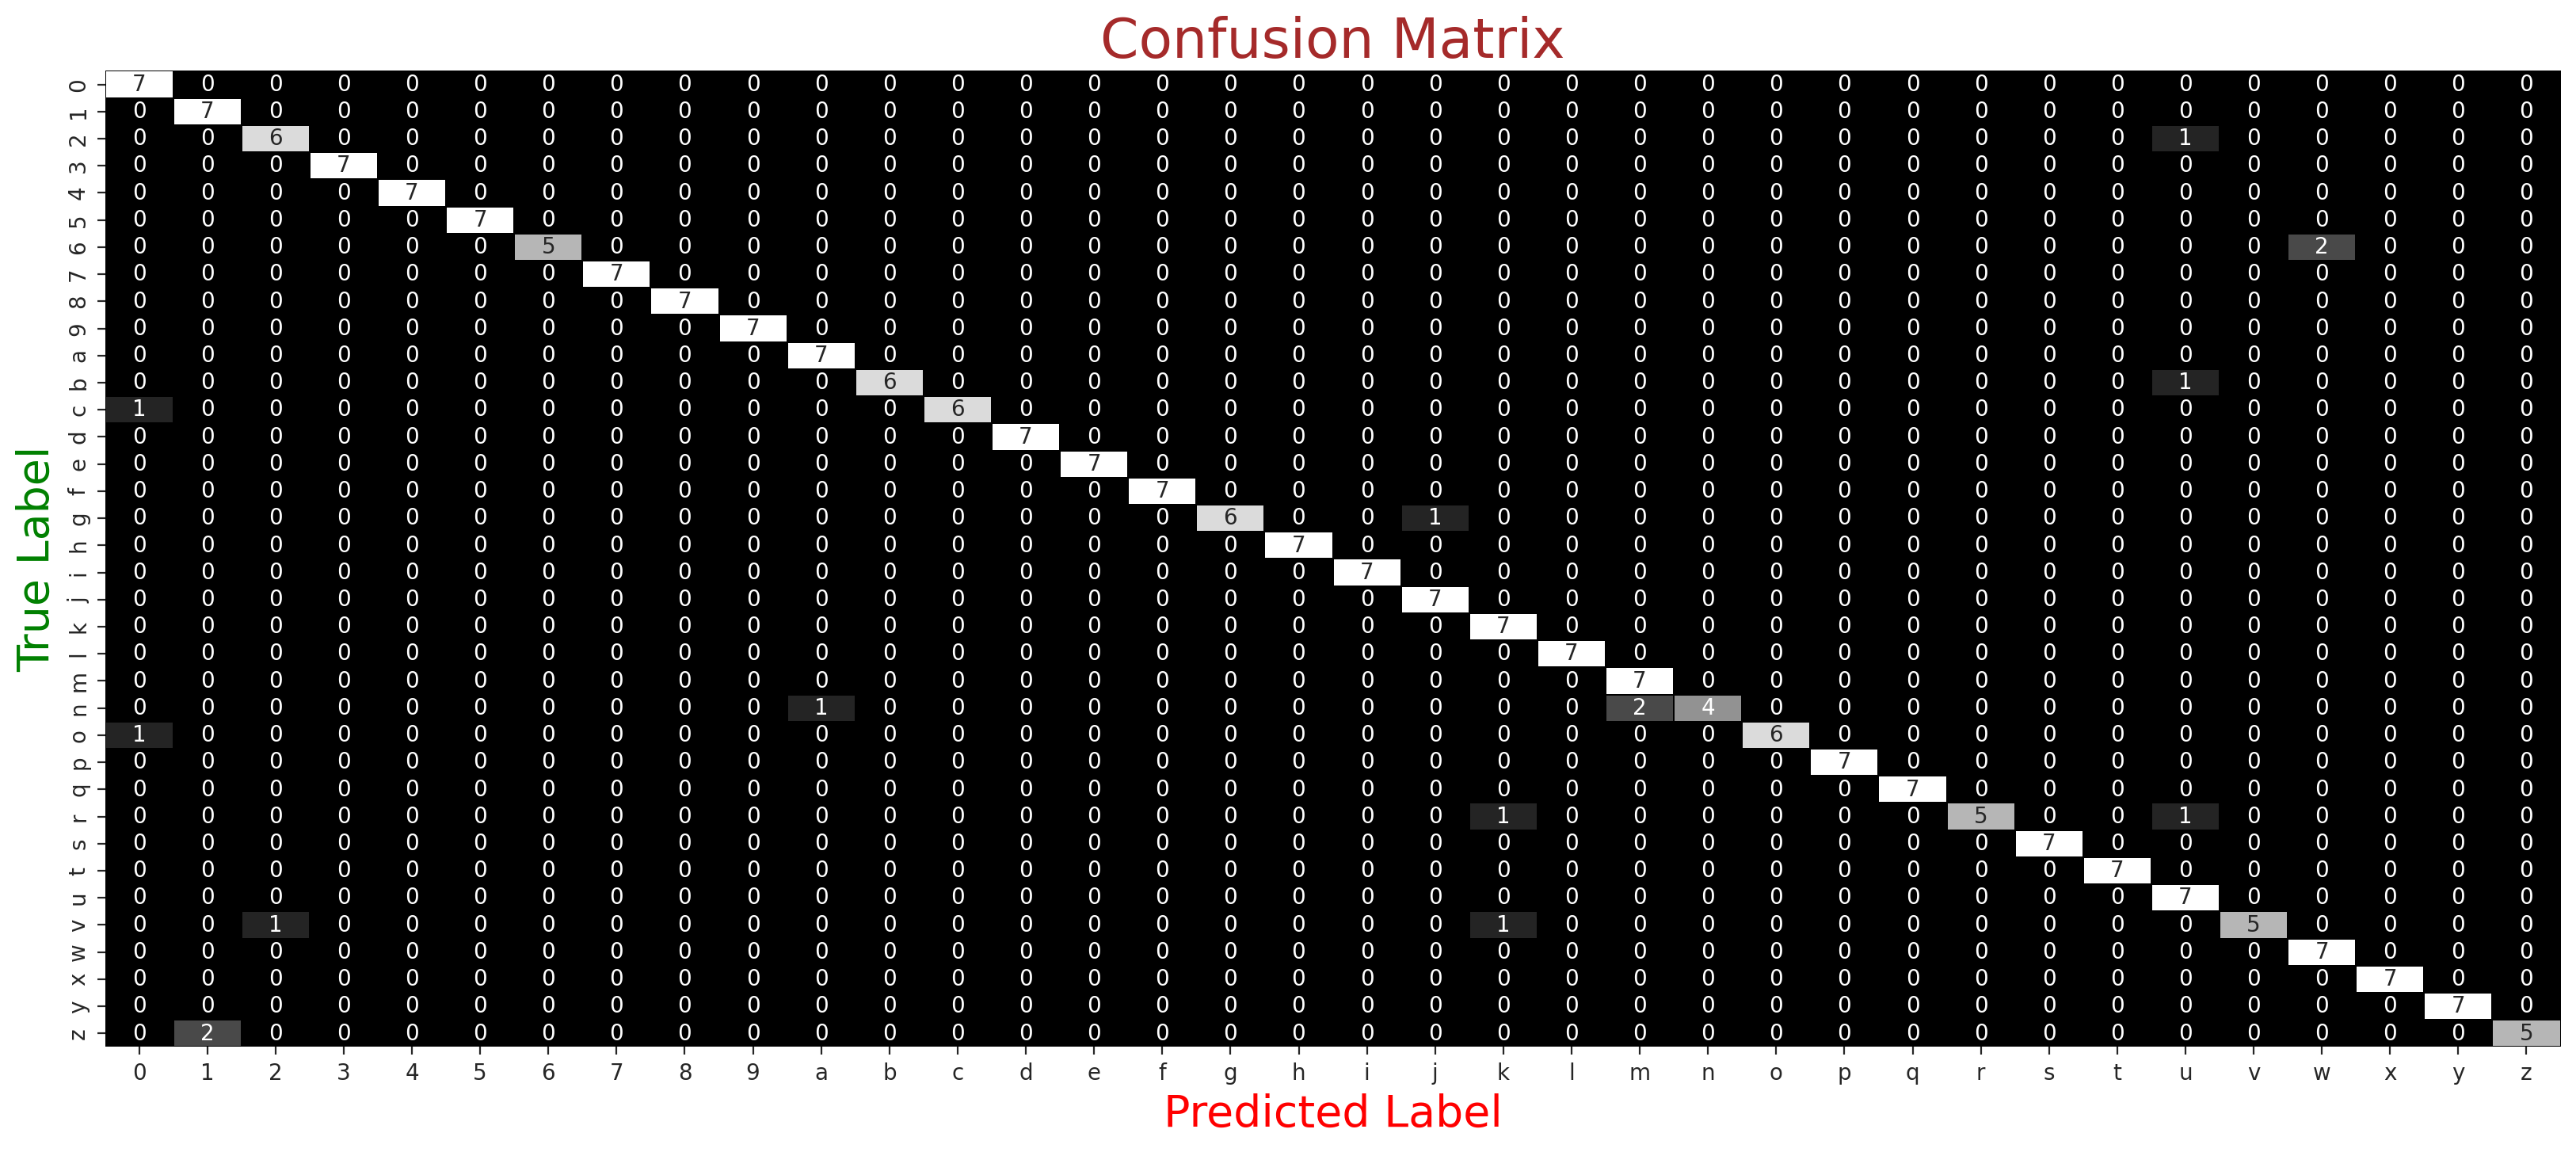

In [ ]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "gist_yarg_r",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=categories.values(),
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                        

In [ ]:
model.save('model_asl_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
label_dict ={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'
, 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i',
             19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r',
             28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z'}


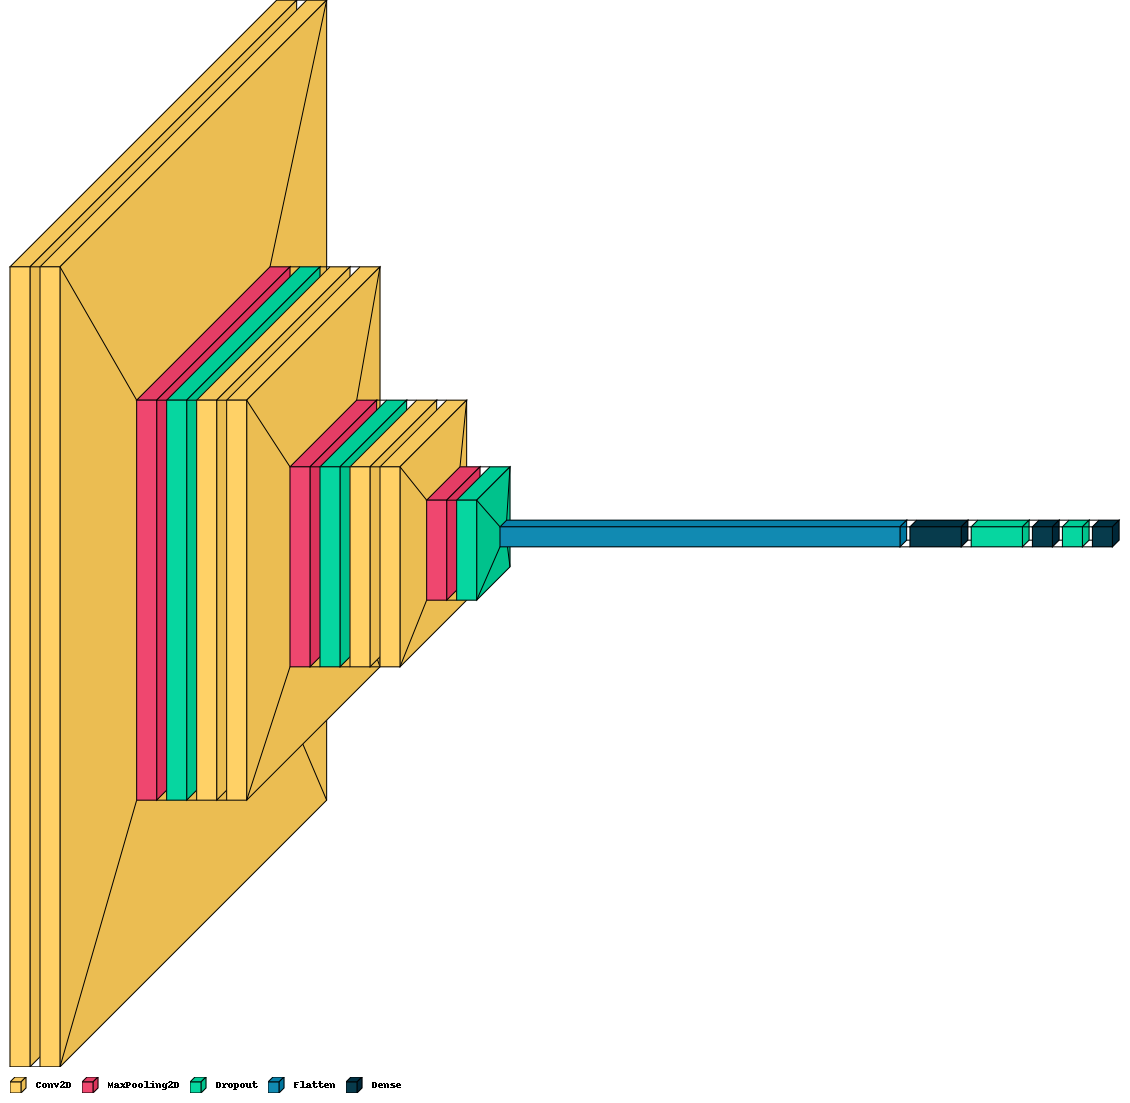

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import visualkeras
from PIL import ImageFont, Image
import matplotlib.pyplot as plt

visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
ImageFont.load_default()
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font)

# Save the image as a PNG file
# plt.savefig('model_visualization.png', format='png', bbox_inches='tight', pad_inches=0.1)
